In [213]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))
df_sf = pd.read_csv("sf_crime_report.csv", parse_dates=['date','time'], infer_datetime_format=True)
sing_colour = ['c']

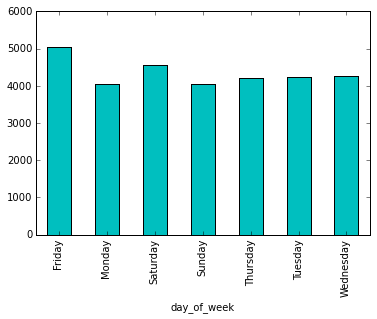

In [214]:
#1 Busiest day of the week
df_sf.groupby('day_of_week').size().plot(kind='bar',legend=False,color=sing_colour)


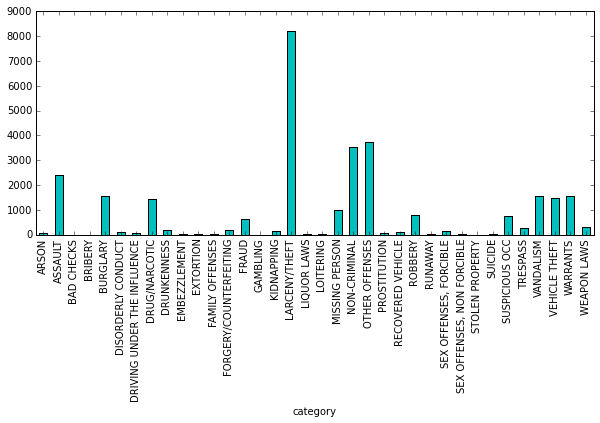

In [216]:
#2 Most popular crime
df_sf.groupby('category').size().plot(kind='bar', legend=False, color=sing_colour, figsize=(10,4))

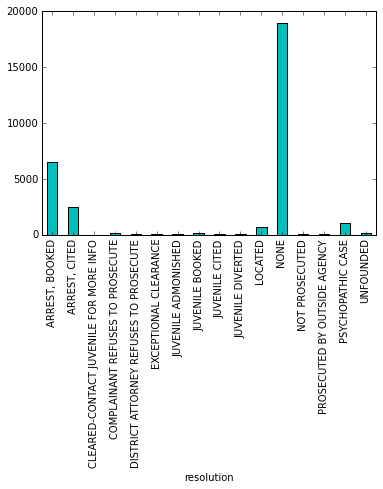

In [217]:
#3 How does SFPD resolve these crimes?
df_sf.groupby('resolution').size().plot(kind='bar', legend=False,color=sing_colour)

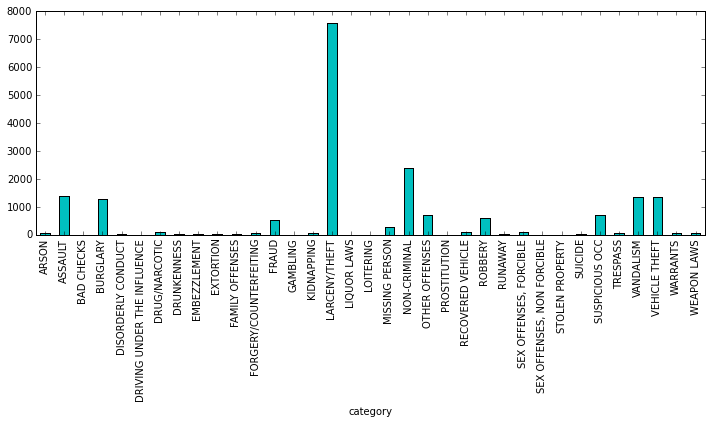

In [234]:
#4 What kind of crime's go unreolved the most?
df_unreolved = df_sf[df_sf.resolution=='NONE']
df_unreolved.groupby('category').size().plot(kind='bar',color=sing_colour, figsize=(12,4))

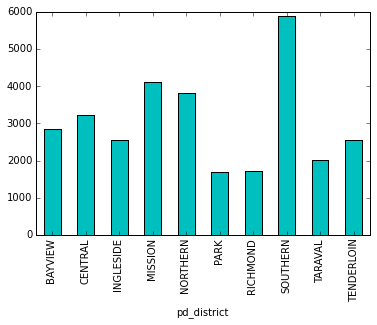

In [221]:
#5 Which police district is most crime ridden
df_sf.groupby('pd_district').size().plot(kind='bar',color=sing_colour)

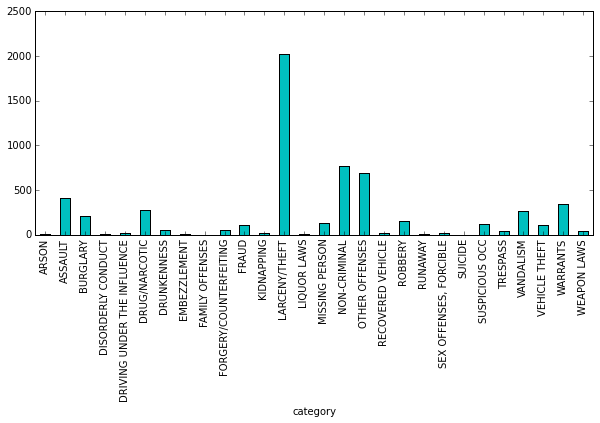

In [225]:
#6 Southern district has the most crimes
# Let's see what kind of crimes these are
df_southern = df_sf[df_sf.pd_district=='SOUTHERN']
df_southern.groupby(df_southern.category).size().plot(kind='bar',color=sing_colour, figsize=(10,4))

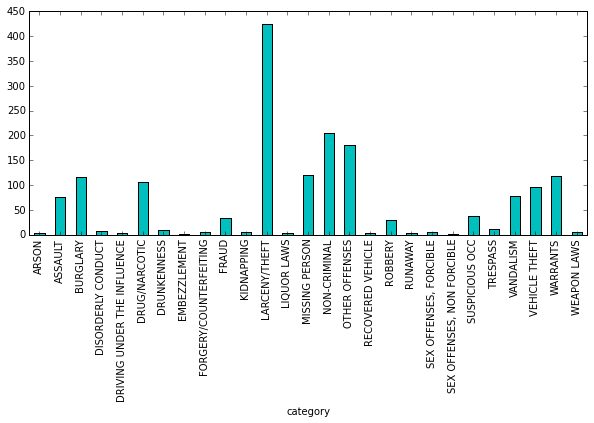

In [239]:
# the above graph seems to be representative of the crimes in SF in general
# Now lets see what kind of crimes hapens in Park which is the least crime ridden (figuratively speaking)
df_park = df_sf[df_sf.pd_district=='PARK']
df_park.groupby(df_park.category).size().plot(kind='bar', color=sing_colour, figsize=(10,4))

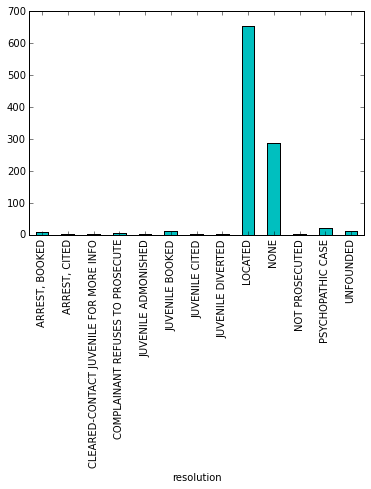

In [227]:
# This is slightly different from the crime stats in Southern, there are more vandalism and warrants in Park
#7 How are missing person cases reolved?
df_missing = df_sf[df_sf.category=='MISSING PERSON']
df_missing.groupby('resolution').size().plot(kind='bar',color=sing_colour)

In [11]:
# Did criminals relax on christmas?
# For this let's see what the crime distribution is on Nov24, Dec24 and Jan 24

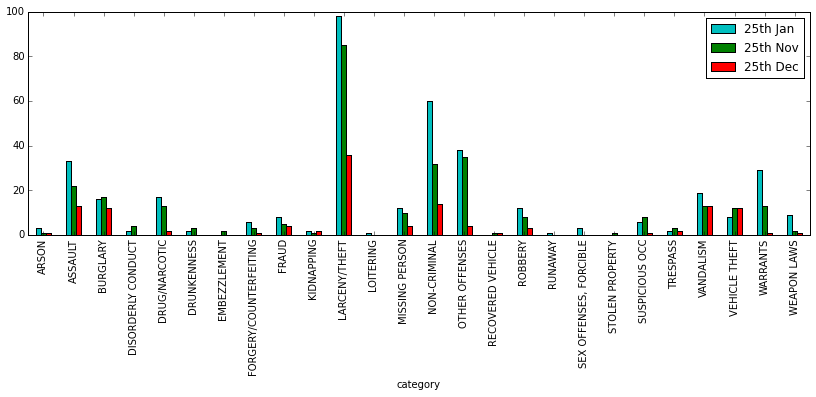

In [241]:
#8 Did criminals relax on christmas?
df_24th_day_of_month = df_sf[df_sf.date.dt.day == 25]
df_24th_day_of_month = df_24th_day_of_month[['category', 'date']]
df_24th_day_of_month.columns = ['category', 'twenty_fifth']
df_24th_day_of_month = df_24th_day_of_month.groupby([df_24th_day_of_month.twenty_fifth.dt.month, df_24th_day_of_month.category]).count()
colours = ['c', 'g','r']
plt = df_24th_day_of_month.unstack(0).plot(kind='bar',color=colours, figsize=(14, 4))
lines, labels = plt.get_legend_handles_labels()
plt.legend(['25th Jan', '25th Nov', '25th Dec'])

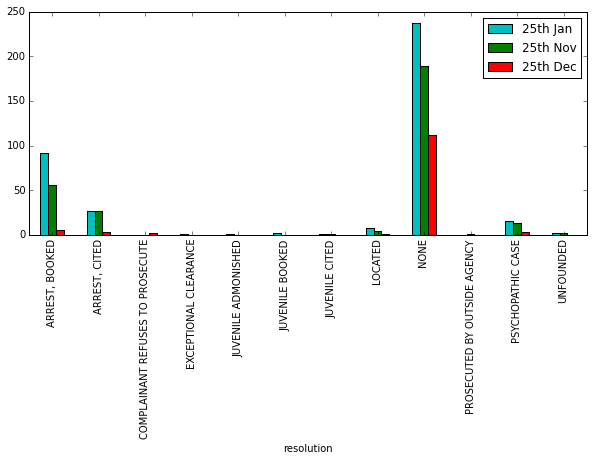

In [242]:
# So criminals do want to be good on Christmas at least
# So let's ask the same question for crime resolution
df_24th_day_of_month = df_sf[df_sf.date.dt.day == 25]
df_24th_day_of_month = df_24th_day_of_month[['resolution', 'date']]
df_24th_day_of_month = df_24th_day_of_month.groupby([df_24th_day_of_month.date.dt.month, df_24th_day_of_month.resolution]).count()
plt = df_24th_day_of_month.unstack(0).plot(kind='bar',color=colours, figsize=(10,4))
lines, labels = plt.get_legend_handles_labels()
plt.legend(['25th Jan', '25th Nov', '25th Dec'], loc='best')

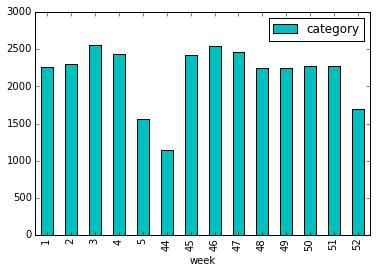

In [228]:
# Can't really conclude anything from this since crime is low on Christmas anyway
# Now let's look at number of crimes committed each week
df_crime_by_Week = df_sf
df_crime_by_Week['week'] = df_sf.date.dt.week
df_crime_by_Week = df_crime_by_Week.sort('date', ascending=True)[['category', 'week']]
df_crime_by_Week.groupby(['week']).count().plot(kind='bar',color=sing_colour)

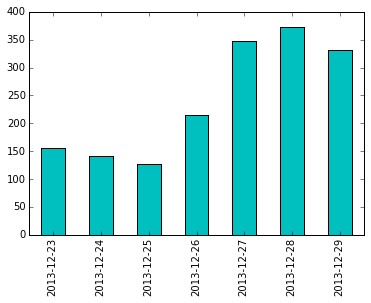

In [229]:
# Week 44 and Week 5 are the extremes ends of this dataset and as such they may not contain all the data that they could have.
# So looking at this the week of christmas is still the week with lowest incidents of reported crime
# Let's look at the crime wave between Dec 23nd and Dec 29th i.e. the week of christmas
df_xmas_week = df_sf[df_sf.date.dt.week == 52]
df_xmas_week.groupby(df_xmas_week.date.dt.date).size().plot(kind='bar',color=sing_colour)

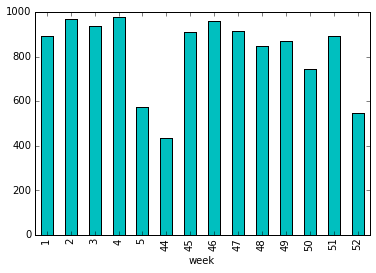

In [230]:
#9 Is there a week when the SFPD was more active?
df_resolution = df_sf[['resolution', 'date']]
df_resolution = df_resolution[df_resolution.resolution != 'NONE'].sort('date')
df_resolution['week'] = df_resolution.date.dt.week
df_resolution.groupby(df_resolution.week).size().plot(kind='bar',color=sing_colour)

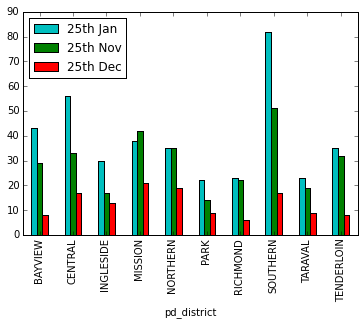

In [243]:
#10. Does christmas have any special effect on the districts
df_24th_day_of_month = df_sf[df_sf.date.dt.day == 25]
df_24th_day_of_month = df_24th_day_of_month[['category', 'date','pd_district']]
df_24th_day_of_month = df_24th_day_of_month.groupby([df_24th_day_of_month.pd_district,df_24th_day_of_month.date.dt.month]).count()
plt = df_24th_day_of_month.drop('date',axis=1).unstack(1).plot(kind='bar',color=colours)
lines, labels = plt.get_legend_handles_labels()
plt.legend(['25th Jan', '25th Nov', '25th Dec'],loc='best')


In [86]:
#It would appear that the Southern district feels more festive than the others. Mission and Northern have more crimes
#in Christmas than Southern. On other days Southern leaves the competition far behind.

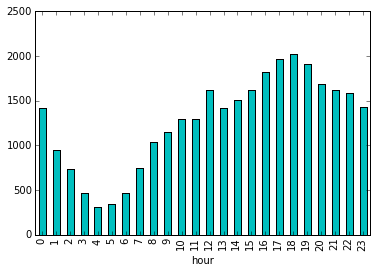

In [231]:
#11. During a 24 hour period when is the most crime reported to have occured
df_hourly = df_sf
df_hourly['hour'] = df_sf.time.dt.hour
df_hourly.groupby('hour').size().plot(kind='bar',color=sing_colour)

In [96]:
# Perhaps number of crimes committed is directly proportional to the number of people who are out on the
# street. Add to that the hour between 4pm to 7pm is when sunlight diminishes. Maybe that has an effect?

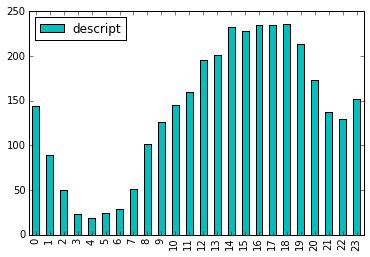

In [232]:
# Let's see the distribution of petty larceny during the day
df_larceny['hour'] = df_sf.time.dt.hour
df_larceny = df_sf[df_sf.category.str.contains('LARCENY') & df_sf.descript.str.contains('PETTY')]
df_larceny = df_larceny[['descript','hour','time']]
df_larceny = df_larceny.groupby('hour').count().reset_index()
df_larceny.drop(['time','hour'], axis=1).plot(kind='bar',color=sing_colour)

/Users/prnbs/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


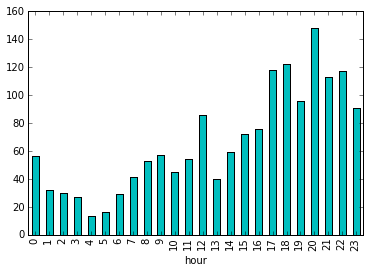

In [233]:
# Now let's see at which hour vehicles get stolen 
df_assault = df_sf[df_sf.category.str.contains('VEHICLE')]
df_assault['hour'] = df_sf.time.dt.hour
df_assault = df_assault[['hour']]
df_assault.groupby('hour').size().plot(kind='bar',color=sing_colour)

In [168]:
df_address = df_sf.groupby('address').count().reset_index()
df_address = df_address[['address', 'category']]
df_address = df_address.sort('category', ascending=False).head(10)
df_address

,address,category
5335,800 Block of BRYANT ST,705
5408,800 Block of MARKET ST,400
1203,1000 Block of POTRERO AV,188
2049,16TH ST / MISSION ST,154
982,100 Block of OFARRELL ST,140
605,0 Block of TURK ST,126
2806,2000 Block of MISSION ST,124
1178,1000 Block of MARKET ST,122
2803,2000 Block of MARKET ST,108
5557,900 Block of MARKET ST,105
